# Computing distance maps

In this recipe, you will learn how to compute the distance to the closest nonzero pixels from each image pixel. This functionality can be used to perform image processing in an adaptive way, for instance, for blurring an image with different strengths, depending on the distance to the closest edge.

Distance maps can be calculated using the OpenCV `cv2.distanceTransform` function. It calculates the specified type of distance (`cv2.DIST_L1, cv2.DIST_L2, cv2.DIST_C`) to the closest zero pixel. You can also vary the mask size that's used for computing the approximate distance (the available options are `cv2.DIST_MASK_3` and `cv2.DIST_MASK_5`). You can also use the `cv2.DIST_MASK_PRECISE` flag, which leads to computing not approximate, but precise distances. 

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S03\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s03\env

d:\html_doc\program\opencv\packt\s03\env\lib\site-packages
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


------  Original-----------------    Shape(480, 640) image: uint8
[ 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 0 255 255 255 255 ]
[ 255 255 255 255 255 255 255 255 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 255 0 0 0 0 ]
[ 255 255 255 255 255 255 0 0 0 0 0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 ]
[ 255 0 0 0 0 0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 ]


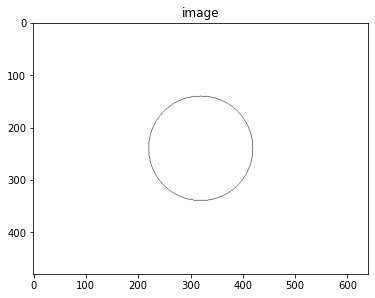

In [2]:
image = np.full((480, 640), 255, np.uint8)
cv2.circle(image, (320, 240), 100, 0)


######################################################
print_image('Original','image',image,140,144,295,325)
plt_view_image(plt,[["image",image]],figsize=(6,6), axis='on', cmap='gray' )

------  Original-----------------    Shape(480, 640) image: uint8
[ 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 0 255 255 255 255 ]
[ 255 255 255 255 255 255 255 255 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 255 0 0 0 0 ]
[ 255 255 255 255 255 255 0 0 0 0 0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 ]
[ 255 0 0 0 0 0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 ]
------  cv2.distanceTransform----    Shape(480, 640) distmap: float32
[ 3.1622777 3.0 3.0 3.0 2.828427 2.236068 2.0 2.0 2.0 2.0 1.4142135 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 ]
[ 2.236068 2.0 2.0 2.0 2.0 1.4142135 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 ]
[ 1.4142135 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.4142135 1.0 1.0 1.0 1.0 ]
[ 1.0 0.0

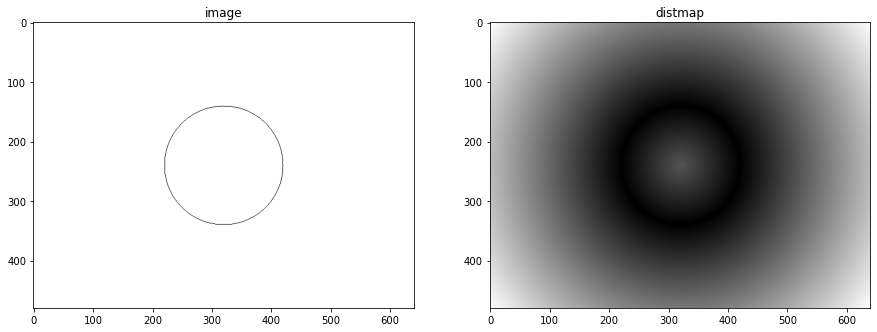

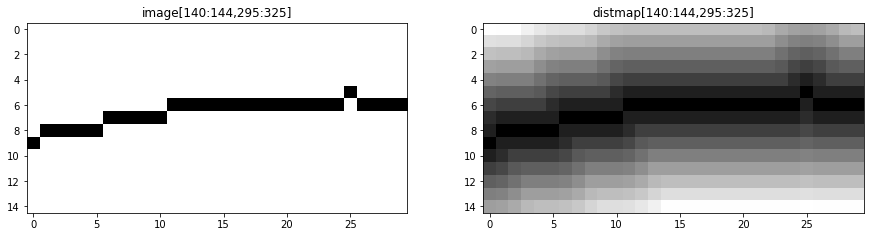

In [5]:
#Distance transform
#Distance transform представляет собой бинарное изображение, где значение каждого пикселя заменяется его расстоянием до 
# ближайшего пикселя фона.
#cv.DistTransform(src, dst, distance_type=CV_DIST_L2, mask_size=3, mask=None, labels=None) -> None
#  InputArray src - 8-bit, single-channel (binary) source image.
#  OutputArray dst – Output image with calculated distances. It is a 32-bit floating-point, single-channel image of the same size as src.
#  int distanceType – Type of distance. It can be CV_DIST_L1, CV_DIST_L2 , or CV_DIST_C.
#  int maskSize – Size of the distance transform mask. It can be 3, 5, or CV_DIST_MASK_PRECISE (the latter option is only 
#                 supported by the first function). In case of the CV_DIST_L1 or CV_DIST_C distance type, the parameter is 
#                 forced to 3 because a 3\times 3 mask gives the same result as 5\times 5 or any larger aperture.
#  labels – Optional output 2D array of labels (the discrete Voronoi diagram). It has the type CV_32SC1 and the same size as src . See the details below.
#  labelType – Type of the label array to build. 
#              DIST_LABEL_CCOMP then each connected component of zeros in src (as well as all the non-zero pixels closest to the connected component) will be assigned the same label. 
#              DIST_LABEL_PIXEL then each zero pixel (and all the non-zero pixels closest to it) gets its own label.

distmap = cv2.distanceTransform(image, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)



####################################################
print_image('Original','image',image,140,144,295,325)
print_image('cv2.distanceTransform','distmap',distmap,140,144,295,325)
plt_view_image(plt,[["image",image],["distmap",distmap]],
               figsize=(15,6), axis='on', cmap='gray' )
plt_view_image(plt,[["image[140:144,295:325]",image[135:150,295:325]],
                    ["distmap[140:144,295:325]",distmap[135:150,295:325]]],
               figsize=(15,6), axis='on', cmap='gray' )